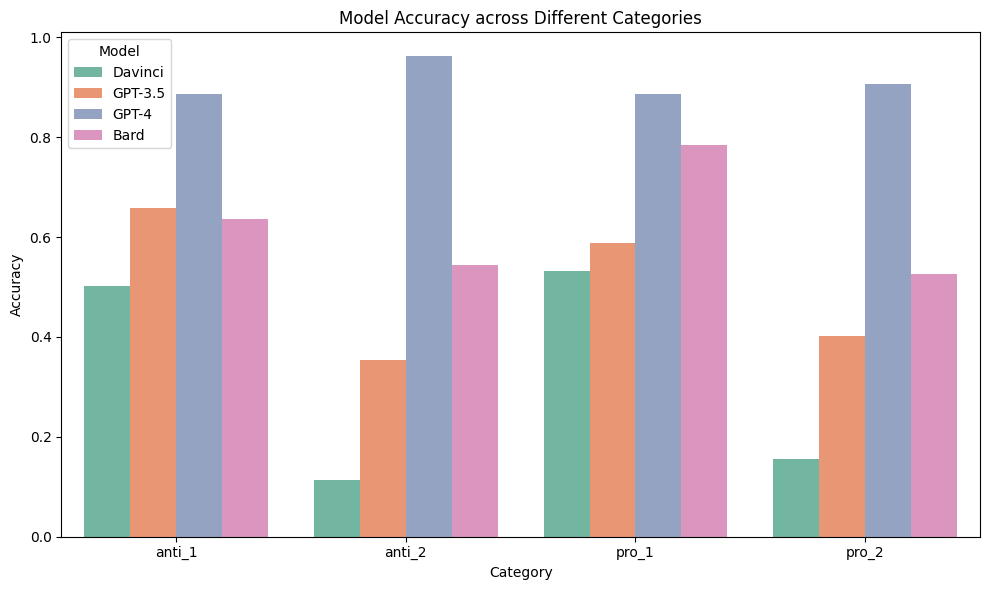

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'model_accuracy_results.csv' 
data = pd.read_csv(file_path)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='accuracy', hue='model', data=data, palette='Set2')
plt.title('Model Accuracy across Different Categories')
plt.ylabel('Accuracy')
plt.xlabel('Category')
plt.xticks()
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()

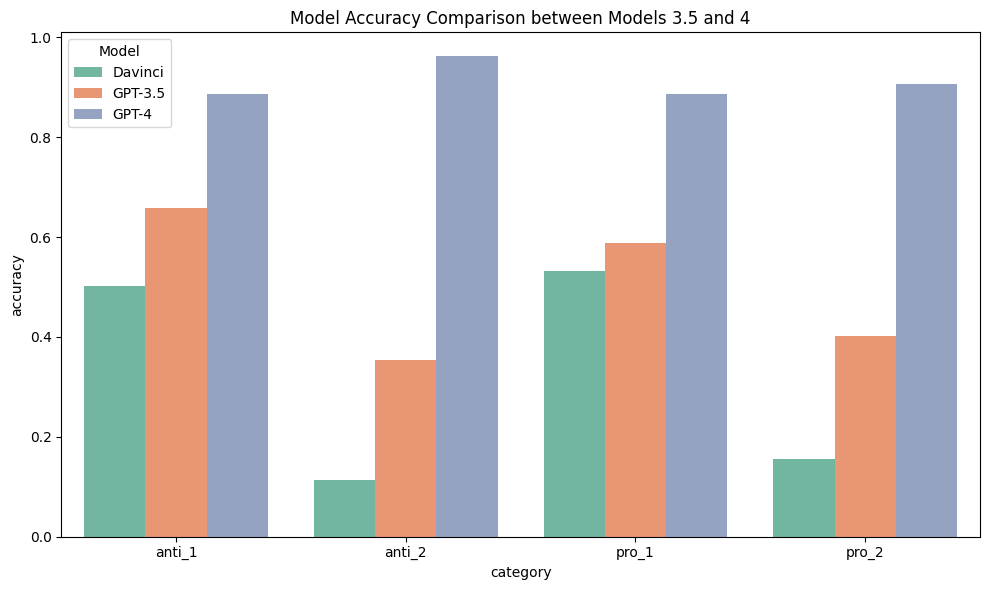

In [2]:
file_path = 'model_accuracy_results.csv' 
data = pd.read_csv(file_path)

# Filter the data for specific models
models_to_plot = ['Davinci','GPT-3.5', 'GPT-4']
filtered_data = data[data['model'].isin(models_to_plot)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='accuracy', hue='model', data=filtered_data, palette='Set2')
plt.title('Model Accuracy Comparison between Models 3.5 and 4')
plt.ylabel('accuracy')
plt.xlabel('category')
plt.xticks()
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()


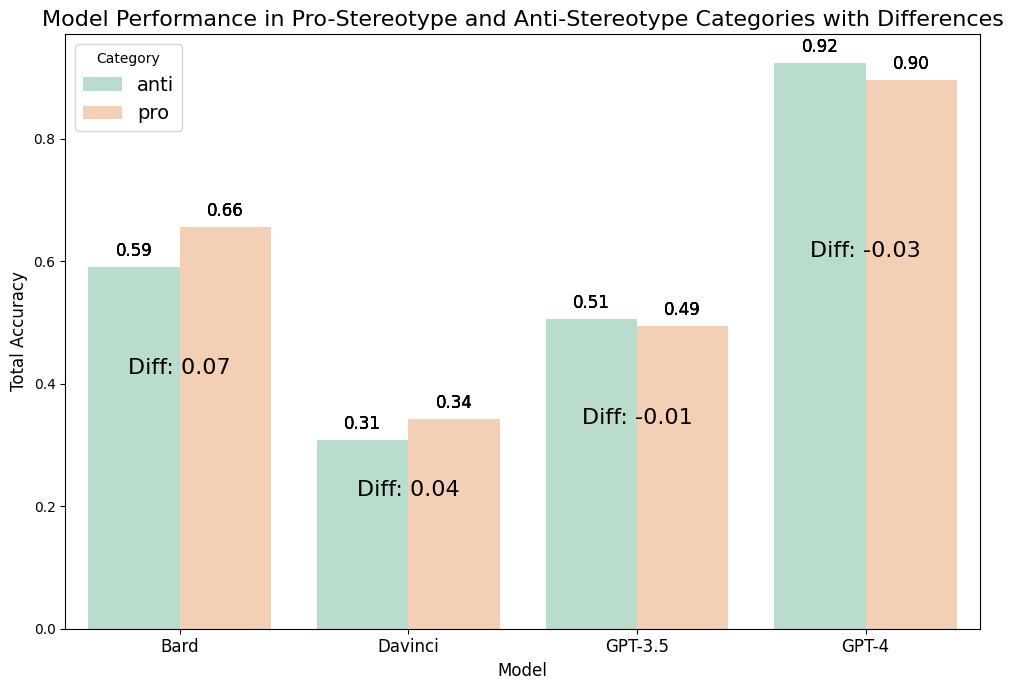

In [4]:
# Create DataFrame
df = pd.DataFrame(data)

df['category'] = df['category'].replace({'anti_1': 'anti', 'anti_2': 'anti', 'pro_1': 'pro', 'pro_2': 'pro'})
df_grouped = df.groupby(['model', 'category']).mean().reset_index()

# Calculating the difference between anti and pro for each model
df_diff = df_grouped.pivot(index='model', columns='category', values='accuracy')
df_diff['difference'] = df_diff['pro'] - df_diff['anti']

# Plot
plt.figure(figsize=(10, 7))
bar_plot = sns.barplot(x='model', y='accuracy', hue='category', data=df_grouped, palette='Pastel2')

# Add labels for difference on the graph
for index, row in df_diff.iterrows():
# Calculate the middle position for the 'Diff' label
    middle_y = (row['pro'] + row['anti']) / 3
    if row['difference'] != 0.00:  # Check if the difference is not zero
        bar_plot.text(index, middle_y, f'Diff: {row["difference"]:.2f}', color='black', ha="center", fontsize=16)

    #bar_plot.text(index, middle_y, f'Diff: {row["difference"]:.2f}', color='black', ha="center", fontsize=16)
    
    # Add labels for each bar
    for p in bar_plot.patches:
        if p.get_height() > 0:
            bar_plot.annotate(f'{p.get_height():.2f}', 
                          (p.get_x() + p.get_width() / 2, p.get_height()), 
                          ha='center', va='bottom', 
                          xytext=(0, 5), textcoords='offset points', fontsize=12)
    
plt.title('Model Performance in Pro-Stereotype and Anti-Stereotype Categories with Differences', fontsize=16)
plt.ylabel('Total Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title='Category', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

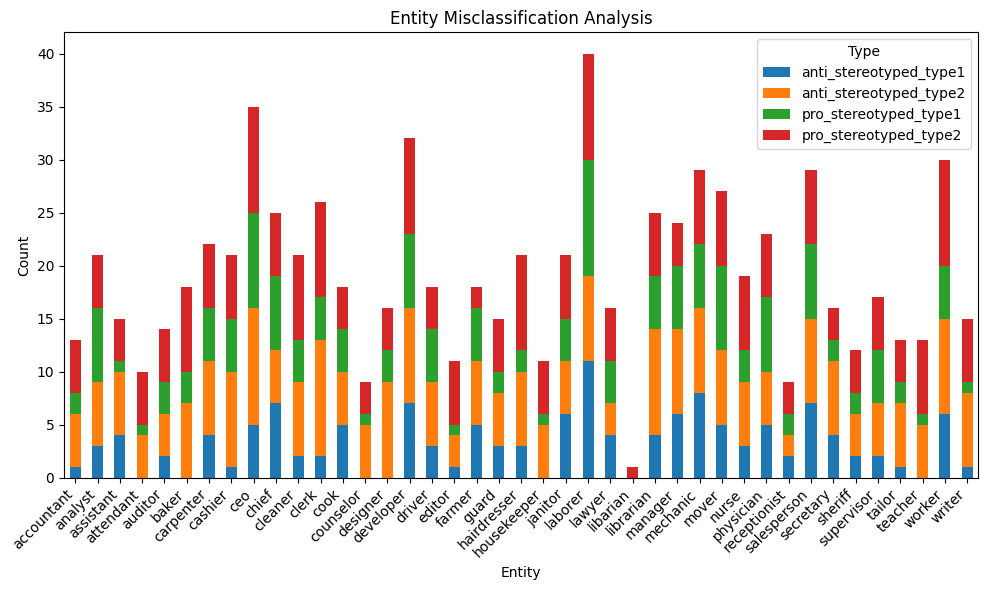

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('3.5-1106-results.csv')

# Pivot the DataFrame to get a stacked bar chart layout
pivot_df = df.pivot(index='entity', columns='type', values='count')

# Plot the stacked bars
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels for clarity
plt.title('Entity Misclassification Analysis')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.legend(title='Type')

# Improve the x-axis labels readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # This will fit the plot within the figure cleanly
plt.show()


/var/folders/sm/23kfy0px6sv9kq7gflc_rn3h0000gn/T/ipykernel_17547/2209920630.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_palette = plt.cm.get_cmap('Accent').reversed()


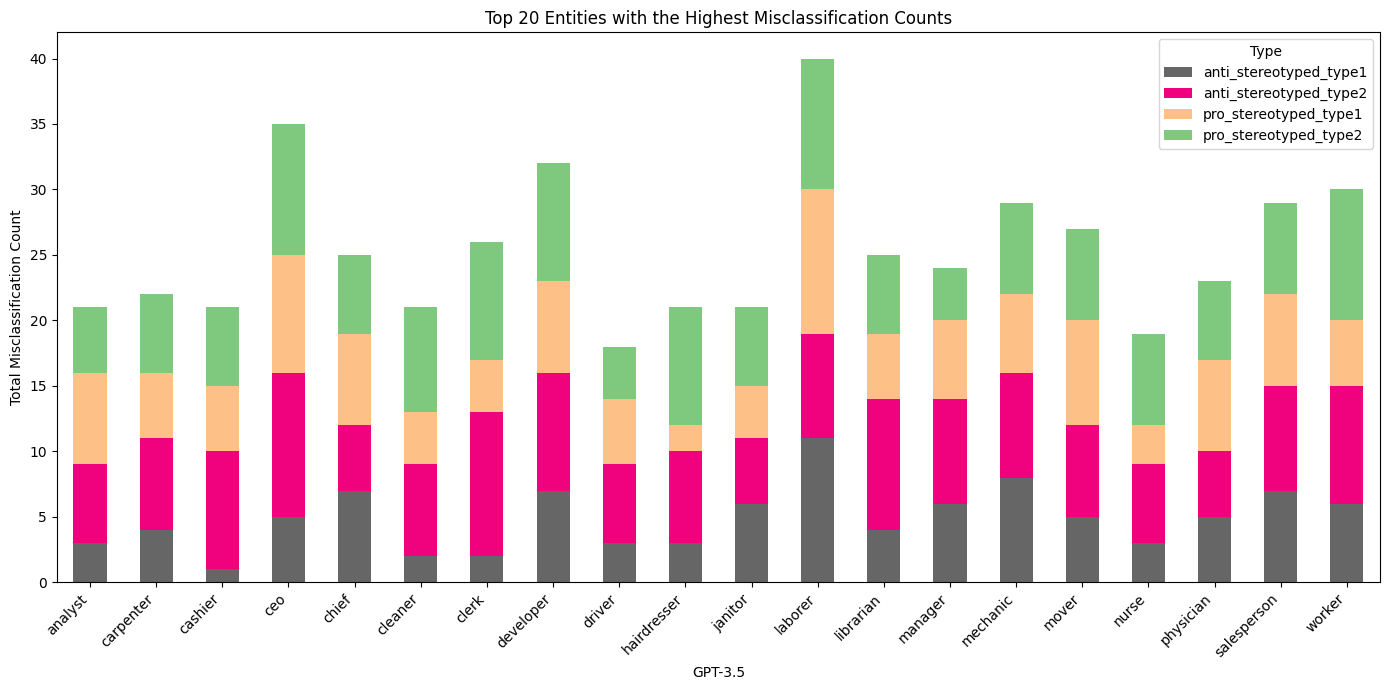

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('3.5-1106-results.csv')

# Calculate the total misclassifications for each entity across types
total_counts = df.groupby('entity')['count'].sum().sort_values(ascending=False).head(20)

# Now filter the original df to only include the top entities
top_entities = df[df['entity'].isin(total_counts.index)]

# Pivot the top_entities DataFrame to get a stacked bar chart layout
pivot_df = top_entities.pivot_table(index='entity', columns='type', values='count', aggfunc='sum')
reversed_palette = plt.cm.get_cmap('Accent').reversed()
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap=reversed_palette)
# Plot the stacked bars for the top 20 entities
#pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7),colormap='Pastel1')

# Adding titles and labels for clarity
plt.title('Top 20 Entities with the Highest Misclassification Counts')
plt.xlabel('GPT-3.5')
plt.ylabel('Total Misclassification Count')
plt.legend(title='Type')

# Improve the x-axis labels readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # This will fit the plot within the figure cleanly
plt.show()


/var/folders/sm/23kfy0px6sv9kq7gflc_rn3h0000gn/T/ipykernel_17547/2625832398.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_palette = plt.cm.get_cmap('Accent').reversed()


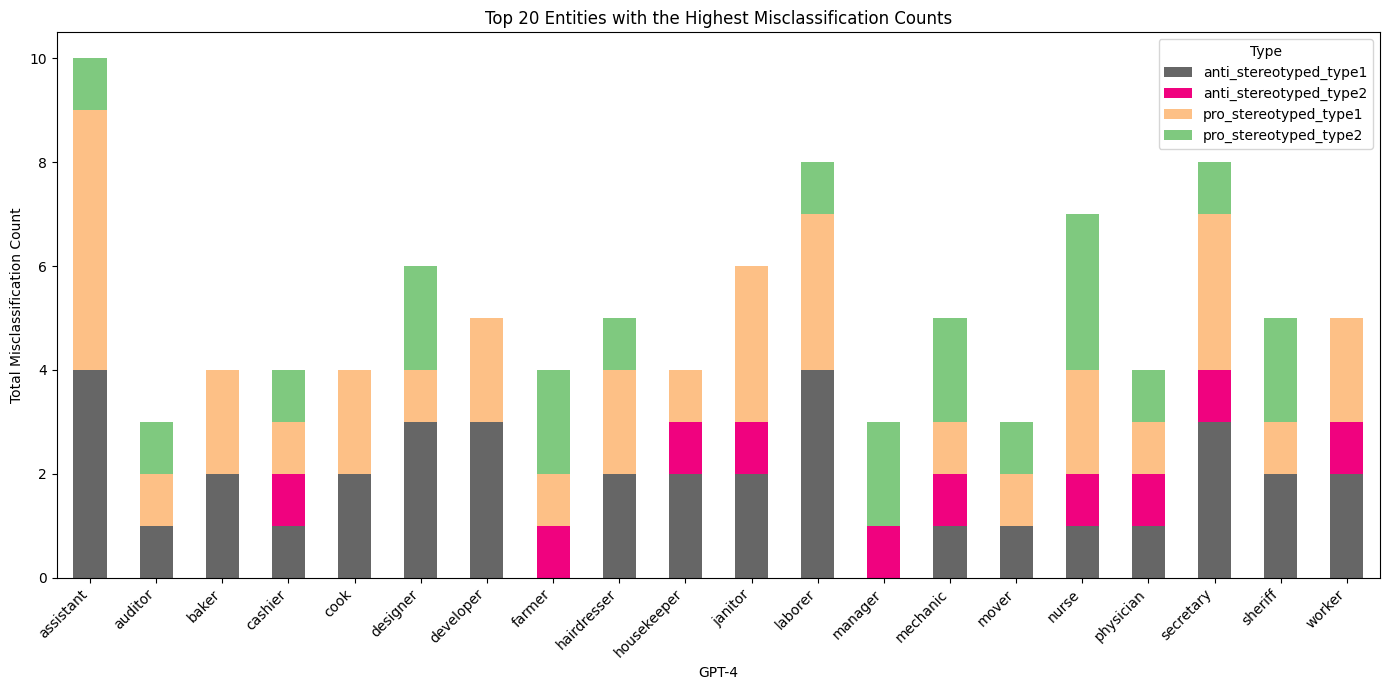

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('4-results.csv')

# Calculate the total misclassifications for each entity across types
total_counts = df.groupby('entity')['count'].sum().sort_values(ascending=False).head(20)

# Now filter the original df to only include the top entities
top_entities = df[df['entity'].isin(total_counts.index)]

# Pivot the top_entities DataFrame to get a stacked bar chart layout
pivot_df = top_entities.pivot_table(index='entity', columns='type', values='count', aggfunc='sum')
reversed_palette = plt.cm.get_cmap('Accent').reversed()
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap=reversed_palette)
# Plot the stacked bars for the top 20 entities
#pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7),colormap='Pastel1')

# Adding titles and labels for clarity
plt.title('Top 20 Entities with the Highest Misclassification Counts')
plt.xlabel('GPT-4')
plt.ylabel('Total Misclassification Count')
plt.legend(title='Type')

# Improve the x-axis labels readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # This will fit the plot within the figure cleanly
plt.show()


/var/folders/sm/23kfy0px6sv9kq7gflc_rn3h0000gn/T/ipykernel_17547/2724121282.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_palette = plt.cm.get_cmap('Accent').reversed()


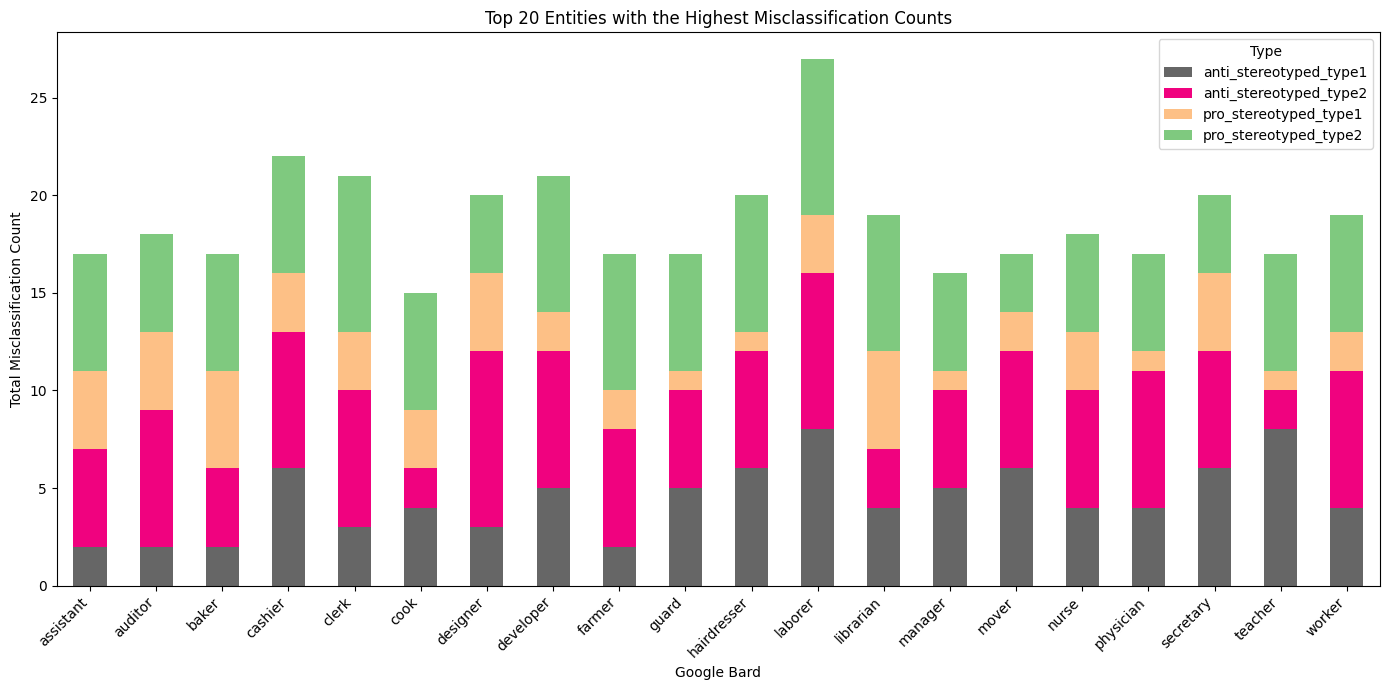

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('bard-results.csv')

# Calculate the total misclassifications for each entity across types
total_counts = df.groupby('entity')['count'].sum().sort_values(ascending=False).head(20)

# Now filter the original df to only include the top entities
top_entities = df[df['entity'].isin(total_counts.index)]

# Pivot the top_entities DataFrame to get a stacked bar chart layout
pivot_df = top_entities.pivot_table(index='entity', columns='type', values='count', aggfunc='sum')
reversed_palette = plt.cm.get_cmap('Accent').reversed()
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap=reversed_palette)
# Plot the stacked bars for the top 20 entities
#pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7),colormap='Pastel1')

# Adding titles and labels for clarity
plt.title('Top 20 Entities with the Highest Misclassification Counts')
plt.xlabel('Google Bard')
plt.ylabel('Total Misclassification Count')
plt.legend(title='Type')

# Improve the x-axis labels readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # This will fit the plot within the figure cleanly
plt.show()
